In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score


In [2]:
data = pd.read_csv("Train.csv")

In [3]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
data.shape

(10999, 12)

In [5]:
data.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [6]:
LE = LabelEncoder()
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = LE.fit_transform(data[col])

<AxesSubplot:>

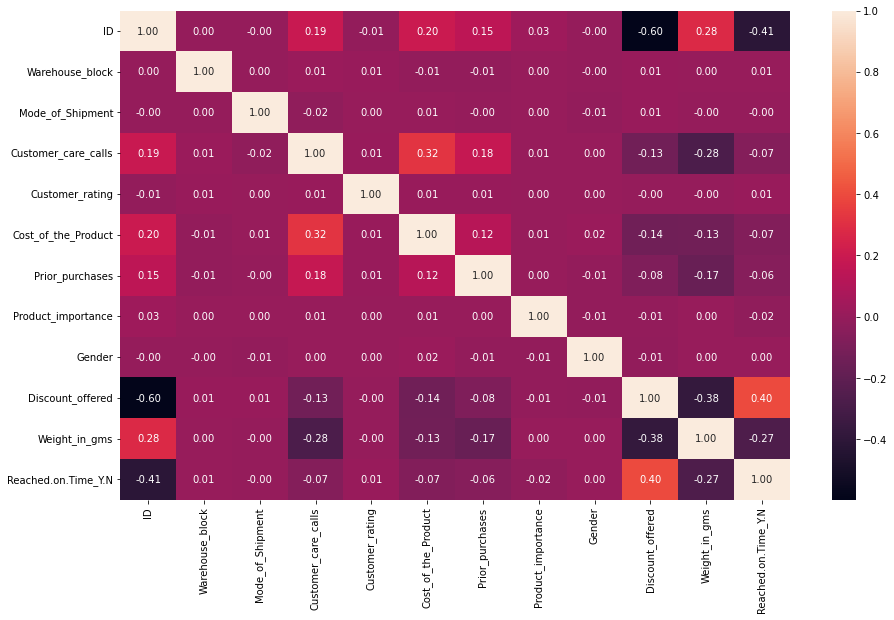

In [7]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method="pearson"), ax=ax,annot=True, fmt=".2f")

In [8]:
target = "Customer_care_calls"

In [9]:
data[target] = data[target].astype("float")

In [10]:
xArray = data.drop(target, axis=1)
yArray = data[target]
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

In [11]:
trainX

,ID,Warehouse_block,Mode_of_Shipment,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
8854,8855,2,2,1,138,10,1,0,4,4496,1
887,888,4,2,3,150,3,2,1,21,1187,1
2477,2478,4,0,2,209,4,2,1,15,3330,1
89,90,4,2,1,186,4,2,0,57,3880,1
3956,3957,0,1,1,157,3,2,1,1,4391,0
...,...,...,...,...,...,...,...,...,...,...,...
7813,7814,4,0,1,240,3,1,0,4,4787,0
10955,10956,4,0,5,125,4,1,1,5,5866,0
905,906,4,2,4,147,3,1,1,13,1145,1
5192,5193,0,1,4,233,3,1,1,8,5076,1


In [12]:
KNN = KNeighborsRegressor(n_neighbors=10)

In [13]:
KNN.fit(trainX, trainY)

KNeighborsRegressor(n_neighbors=10)

In [14]:
testY.shape

(2200,)

In [15]:
KNN.predict(testX).shape

(2200,)

In [49]:
kf = KFold(n_splits=10)
scores = cross_val_score(KNeighborsRegressor(n_neighbors=5), xArray, yArray, scoring='r2', cv=6)

In [50]:
scores

array([-0.19649137, -0.24845836,  0.19951572,  0.1790049 ,  0.20675991,
       -0.04392033])

Text(0.5, 1.0, 'Гиперпараметр при KFold()')

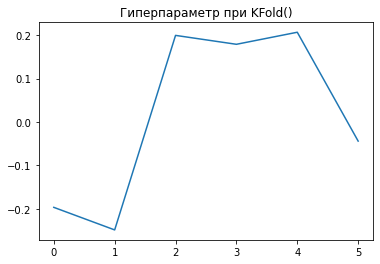

In [51]:
plt.plot(range(len(scores)), scores)
plt.title("Гиперпараметр при KFold()")

## Результаты(метрики)

## Гиперпараметры

## Модель